In [ ]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/FinalYear_Project/swedish_dl/train'
valid_path = '/content/drive/MyDrive/FinalYear_Project/swedish_dl/test'
# add preprocessing layer to the front of VGG

base_model = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in base_model.layers:
  layer.trainable = False
  

In [ ]:
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/FinalYear_Project/swedish_dl/train/*')
len(folders)

15

In [ ]:
# our layers - you can add more if you want
x = Flatten()(base_model.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=base_model.input, outputs=prediction)

# view the structure of the model
 #model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/FinalYear_Project/swedish_dl/train',
                                                 target_size = (224,224),
                                                 batch_size = 5,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/FinalYear_Project/swedish_dl/test',
                                            target_size = (224,224),
                                            batch_size = 5,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
'''r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)'''

model.fit(
  training_set,
  validation_data=test_set,
  epochs=10)

Found 960 images belonging to 15 classes.
Found 165 images belonging to 15 classes.
Epoch 1/10
192/192 [==============================] - 113s 569ms/step - loss: 9.9465 - accuracy: 0.5943 - val_loss: 1.0757 - val_accuracy: 0.8788
Epoch 2/10
192/192 [==============================] - 135s 704ms/step - loss: 0.8044 - accuracy: 0.9294 - val_loss: 0.8041 - val_accuracy: 0.9394
Epoch 3/10
192/192 [==============================] - 130s 678ms/step - loss: 0.8859 - accuracy: 0.9405 - val_loss: 1.0024 - val_accuracy: 0.9455
Epoch 4/10
192/192 [==============================] - 129s 673ms/step - loss: 0.9461 - accuracy: 0.9341 - val_loss: 1.8093 - val_accuracy: 0.9212
Epoch 5/10
192/192 [==============================] - 130s 678ms/step - loss: 0.9442 - accuracy: 0.9628 - val_loss: 1.2904 - val_accuracy: 0.9455
Epoch 6/10
192/192 [==============================] - 131s 683ms/step - loss: 0.2225 - accuracy: 0.9845 - val_loss: 1.0922 - val_accuracy: 0.9515
Epoch 7/10
192/192 [====================

In [ ]:
test_loss,test_acc = model.evaluate(test_set,verbose=2)
print('Test Accuracy : ',test_acc)


33/33 - 3s - loss: 1.0787 - accuracy: 0.9636
Test Accuracy :  0.9636363387107849


In [ ]:
training_set.class_indices


{'Acer': 0,
 'Alnus incana': 1,
 'Betula pubescens': 2,
 'Fagus silvatica': 3,
 'Populus': 4,
 'Populus tremula': 5,
 'Quercus': 6,
 'Salix alba': 7,
 'Salix aurita': 8,
 'Salix sinerea': 9,
 'Sorbus aucuparia': 10,
 'Sorbus intermedia': 11,
 'Tilia': 12,
 'Ulmus carpinifolia': 13,
 'Ulmus glabra': 14}

In [ ]:
#leaf1:Ulmus carpinifolia
#leaf2:Acer
#leaf3:Salix aurita
#leaf4:Quercus
#leaf5:Alnus incana
#leaf6:Betula pubescens
#leaf7:Salix alba
#leaf8:Populus tremula
#leaf9:Ulmus glabra
#leaf10:Sorbus aucuparia
#leaf11:Salix sinerea
#leaf12:Populus
#leaf13:Tilia
#leaf14:Sorbus intermedia
#leaf15:Fagus silvatica

Copy of l10nr065.tif


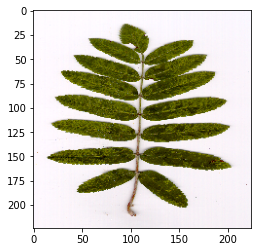

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Copy of l11nr071.tif


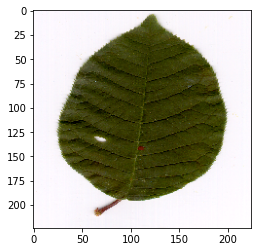

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Copy of l13nr065.tif


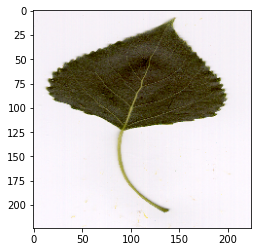

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Copy of l4nr070.tif


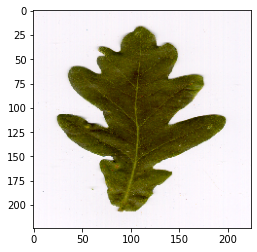

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Copy of l6nr070.tif


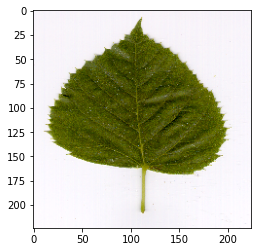

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
import cv2
import os
import numpy as np

dir_path = '/content/drive/MyDrive/FinalYear_Project/swedish_dl/val'
##Predicting with model
#loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/FinalYear_Project/swedish_model/Resnet.h5')

for i in os.listdir(dir_path):
   img =  image.load_img(dir_path+'/'+i,target_size=(224,224))
   print(i)
   plt.imshow(img)
   plt.show()
   X = image.img_to_array(img)
   X = np.expand_dims(X,axis=0)
   images = np.vstack([X])
   val = model.predict(images)
   print(val)



In [ ]:
from keras.models import load_model
model.save('/content/drive/My Drive/Models/InceptionKris.h5')